In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

In [3]:
dt = pd.read_csv("C:/Users/VISHAL S PANCHANGE/Downloads/delivery_time.csv")
dt.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### EDA and Data Visualization


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
dt.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [6]:
dt.shape

(21, 2)

In [7]:
dt.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
dt.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


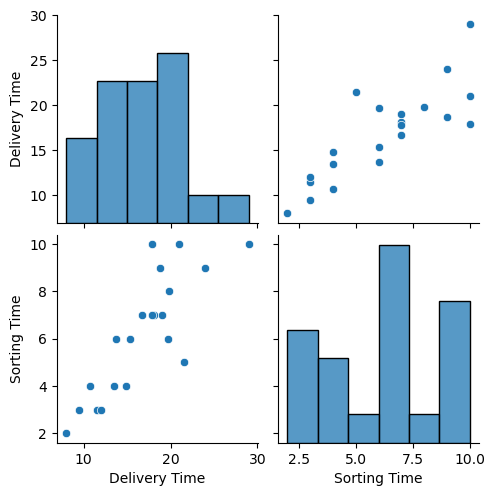

In [9]:
sns.pairplot(dt)

C:\Users\VISHAL S PANCHANGE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

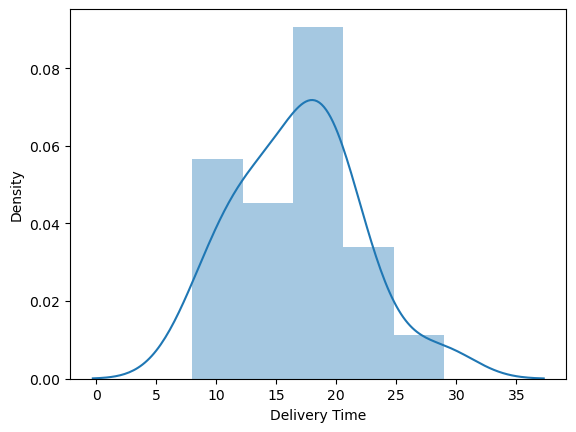

In [10]:
sns.distplot(dt['Delivery Time'])

C:\Users\VISHAL S PANCHANGE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

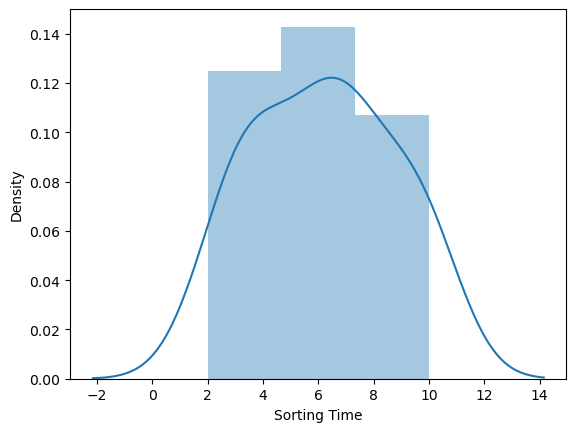

In [11]:
sns.distplot(dt['Sorting Time'])

In [19]:
dt.rename(columns = {'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'}, inplace = True)
dt.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### Model Building

In [21]:
model = smf.ols('Delivery_Time~ Sorting_Time', data = dt).fit()

### Model Testing

In [23]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [24]:
print(model.tvalues , model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [25]:
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

### Model Predictions

In [29]:
data_predict = pd.DataFrame({'Sorting_Time': [4,6,8,9,10]})
data_predict

,Sorting_Time
0,4
1,6
2,8
3,9
4,10


In [30]:
model.predict(data_predict)

0    13.178814
1    16.476853
2    19.774893
3    21.423913
4    23.072933
dtype: float64